<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/hurst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install hurst --q

[*********************100%%**********************]  1 of 1 completed


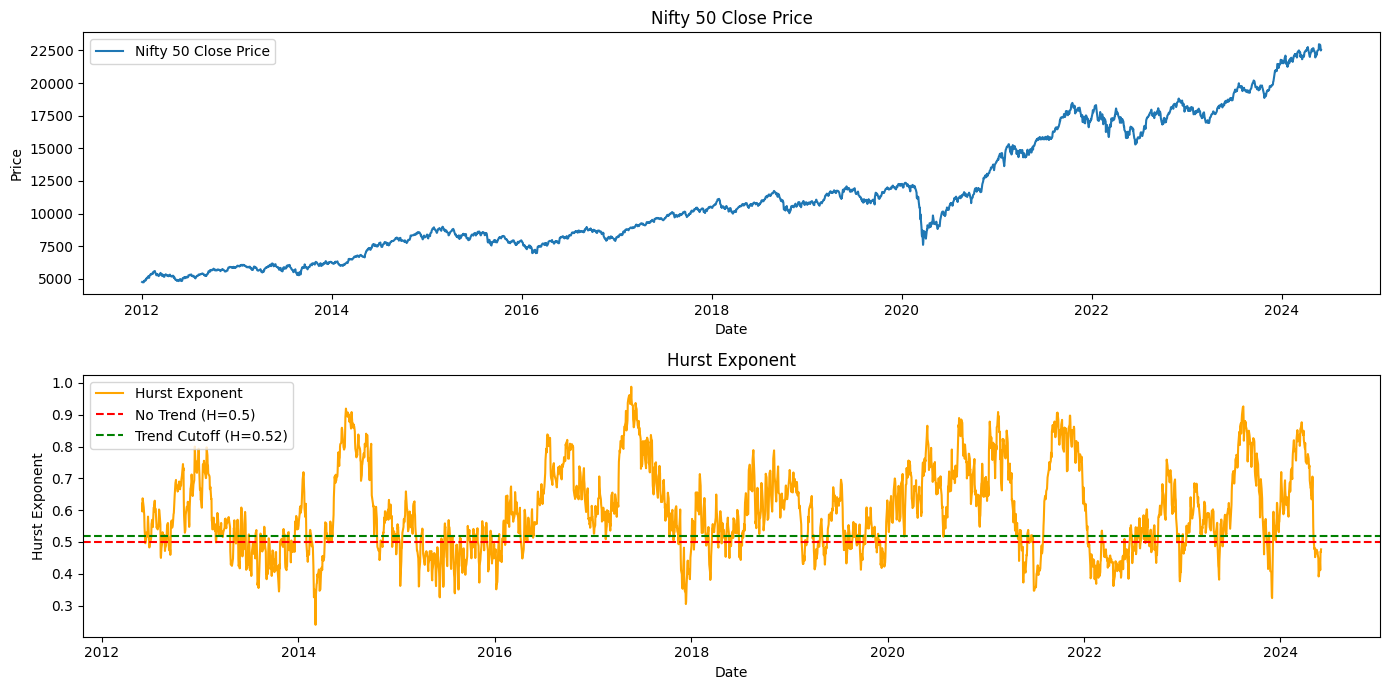

In [12]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from hurst import compute_Hc

# Function to calculate the Hurst exponent
def hurst_exponent(ts):
    H, c, data = compute_Hc(ts, kind='price', simplified=True)
    return H

# Download Nifty 50 data from Yahoo Finance
nifty50 = yf.download('^NSEI', start='2012-01-01')

# Calculate Hurst exponent
nifty50['Hurst'] = nifty50['Close'].rolling(window=100).apply(hurst_exponent)

# Plotting
plt.figure(figsize=(14, 7))

# Plot Nifty 50 Close Price
plt.subplot(2, 1, 1)
plt.plot(nifty50['Close'], label='Nifty 50 Close Price')
plt.title('Nifty 50 Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Hurst Exponent
plt.subplot(2, 1, 2)
plt.plot(nifty50['Hurst'], label='Hurst Exponent', color='orange')
plt.axhline(y=0.5, color='r', linestyle='--', label='No Trend (H=0.5)')
plt.axhline(y=0.52, color='g', linestyle='--', label='Trend Cutoff (H=0.52)')
plt.title('Hurst Exponent')
plt.xlabel('Date')
plt.ylabel('Hurst Exponent')
plt.legend()

plt.tight_layout()
plt.show()
